Logistic Regression Implementation

In [1]:
import numpy as np
import pandas as pd

In [2]:
# load in the data files

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
# obtain the shape of the training set
train_data.shape

(32950, 53)

In [4]:
# obtain the shape of the training set
test_data.shape

(8238, 53)

**test on the full data**

In [5]:
# obtain the x and y subsets
y_train_pre = train_data["y"]
y_test_pre = test_data["y"]

X_train = train_data.iloc[:,3:52]
X_test = test_data.iloc[:,3:52]

In [6]:
# update the data type of the y to int
# 0 - no
# 1 - yes

y_test = y_test_pre
y_test[y_test_pre=="yes"] = 1
y_test[y_test_pre=="no"] = 0
y_test = y_test_pre.astype("int32")
y_test

<ipython-input-6-7d2d612a8258>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test[y_test_pre=="yes"] = 1
<ipython-input-6-7d2d612a8258>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test[y_test_pre=="no"] = 0


0       0
1       0
2       0
3       0
4       0
       ..
8233    0
8234    0
8235    0
8236    0
8237    0
Name: y, Length: 8238, dtype: int32

In [7]:
# update the data type of the y to int

y_train = y_train_pre
y_train[y_train_pre=="yes"] = 1
y_train[y_train_pre=="no"] = 0
y_train = y_train.astype("int32")


<ipython-input-7-945b454eab67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[y_train_pre=="yes"] = 1
<ipython-input-7-945b454eab67>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[y_train_pre=="no"] = 0


**Fitting Logistic Regressing using All Features**

In [8]:
# apply logistic regression to the train subsets
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(penalty='l2',  max_iter=500)
log_model.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [9]:
yhat = log_model.predict(X_test)

In [10]:
# obtain the classification rate for the full model
np.mean(yhat==y_test)

0.896698227725176

0.7943383708136013


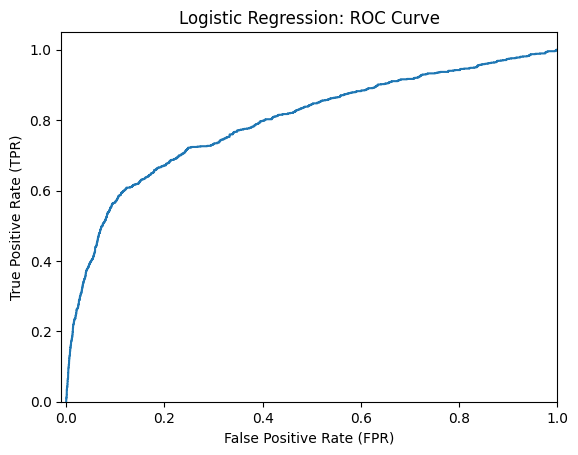

In [11]:
# obtain the ROC curve for the full model and AUC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_scores = log_model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# plot the ROC curve
plt.plot(fpr, tpr)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Logistic Regression: ROC Curve')
print(auc(fpr, tpr))

**Fitting Logistic Regressing using Subset Selection**

In [12]:
from sklearn.feature_selection import SequentialFeatureSelector

In [13]:
# perform subset selection on the categorical predictors
from sklearn.feature_selection import SelectKBest, chi2

X_train_new_cate = SelectKBest(chi2, k=15).fit(X_train.iloc[:,0:42], y_train)

X_train_new_cate.get_feature_names_out()

array(['poutcome[T.nonexistent]', 'poutcome[T.success]',
       'contact[T.telephone]', 'job[T.blue-collar]', 'job[T.retired]',
       'job[T.student]', 'marital[T.single]',
       'pdays[T.client WAS previously contacted]', 'month[T.dec]',
       'month[T.mar]', 'month[T.may]', 'month[T.oct]', 'month[T.sep]',
       'education[T.basic.9y]', 'education[T.university.degree]'],
      dtype=object)

In [14]:
# perform subset selection on the quantitative predictors
from sklearn.feature_selection import f_regression, mutual_info_classif

X_train_new_quant = SelectKBest(mutual_info_classif, k=3).fit(X_train.iloc[:,42::], y_train)


X_train_new_quant.get_feature_names_out()

array(['cons_price_idx', 'euribor3m', 'cons_conf_idx'], dtype=object)

In [15]:
# obtain the subsetted variable names

subsetted_features = np.hstack((X_train_new_cate.get_feature_names_out(), X_train_new_quant.get_feature_names_out()))
X_train_best = X_train[subsetted_features]
X_test_best = X_test[subsetted_features]


# apply the model on these features

log_model_reduced = LogisticRegression(penalty='l2',  max_iter=500)
log_model_reduced.fit(X_train_best,y_train)

yhat_reduced = log_model_reduced.predict(X_test_best)
yhat_reduced

# obtain the classification rate for the reduced model
np.mean(yhat_reduced==y_test)

0.8971837824714737

0.785931837736467


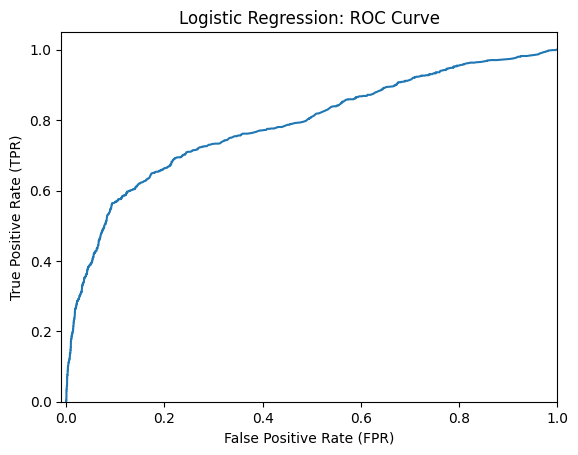

In [16]:
# obtain the ROC curve for the reduced model
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_scores = log_model_reduced.decision_function(X_test_best)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# plot the ROC curve
plt.plot(fpr, tpr)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Logistic Regression: ROC Curve')
print(auc(fpr, tpr))

**Additional Classification Metrics under Both Models**

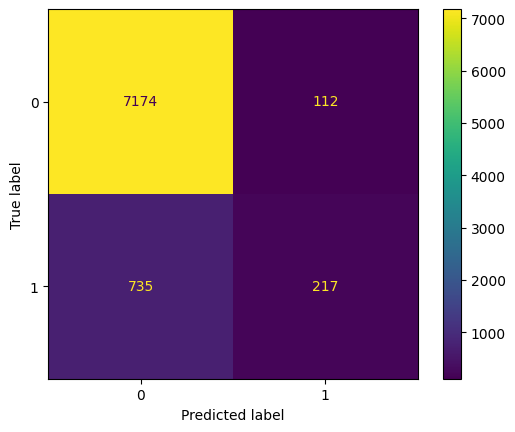

In [17]:
# display the conf. matrix for the reduced model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_reduced = confusion_matrix(y_test, yhat_reduced)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_reduced)
disp.plot()
plt.show()

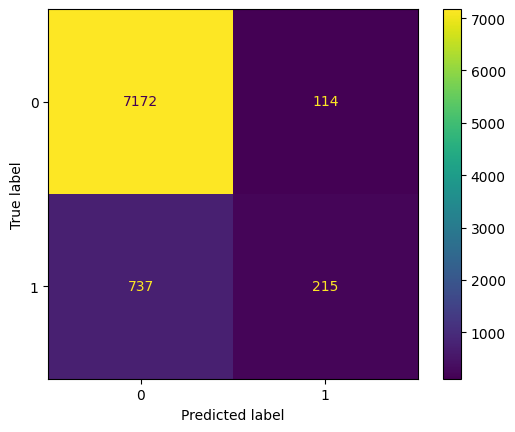

In [18]:
# display the conf. matrix for the full model
cm = confusion_matrix(y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [19]:
# calculate the sensitivity metrics for the model with 10 predictors
TP_reduced = cm_reduced[1,1]
FP_reduced = cm_reduced[0,1]
FN_reduced = cm_reduced[1,0]
TN_reduced = cm_reduced[0,0]

sens_reduced = TP_reduced /(TP_reduced+FN_reduced)
print("The sensitivity is, ", sens_reduced)

spec_reduced = TN_reduced /(TN_reduced+FP_reduced)
print("The specificity is, ", spec_reduced)

precision_reduced = TP_reduced /(TP_reduced+FP_reduced)
print("The precision is, ", precision_reduced)

f1_reduced = (2*precision_reduced*sens_reduced)/(precision_reduced+sens_reduced)
print("The f1 score is, ", f1_reduced)

The sensitivity is,  0.22794117647058823
The specificity is,  0.9846280538018117
The precision is,  0.6595744680851063
The f1 score is,  0.33879781420765026


In [20]:
# calculate the sensitivity metrics for the model with all predictors
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[0,0]

sens = TP /(TP+FN)
print("The sensitivity is, ", sens)

spec = TN /(TN+FP)
print("The specificity is, ", spec)

precision = TP /(TP+FP)
print("The precision is, ", precision)

f1 = (2*precision*sens)/(precision+sens)
print("The f1 score is, ", f1)

The sensitivity is,  0.22584033613445378
The specificity is,  0.9843535547625584
The precision is,  0.6534954407294833
The f1 score is,  0.3356752537080406
